# Lab 3 
## Linear models

----

In [1]:
library(rstanarm)
options(mc.cores = parallel::detectCores())

Loading required package: Rcpp

This is rstanarm version 2.21.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())



In [2]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


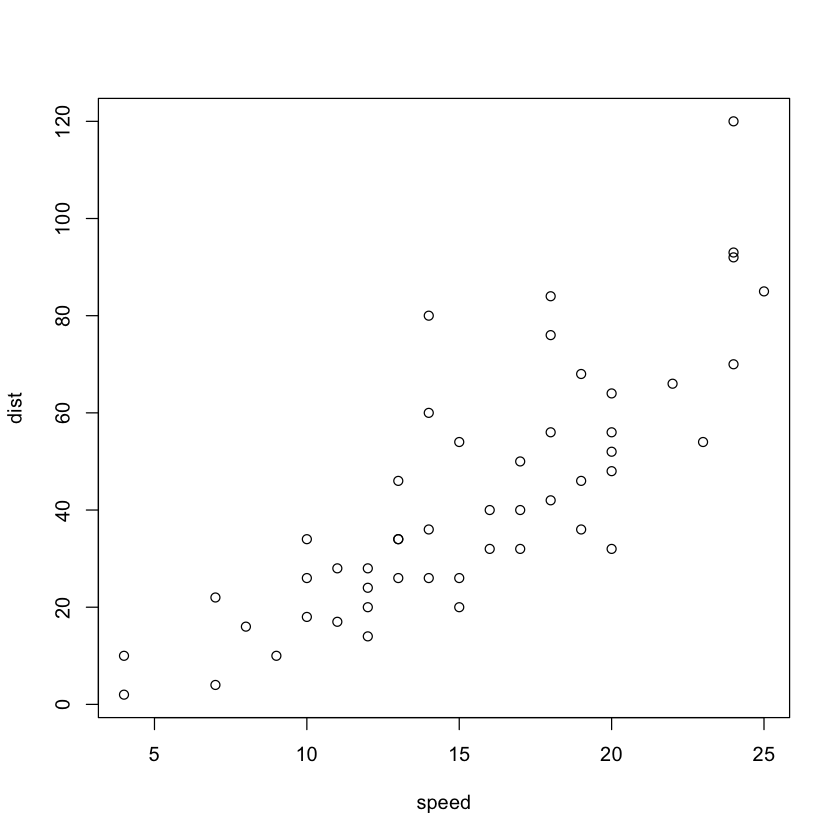

In [7]:
par(bg = 'white')
plot(dist ~ speed, cars)

### Simple linera model

In [18]:
# fitting linear regression model
fit <- lm(dist ~ speed, cars)
fit


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


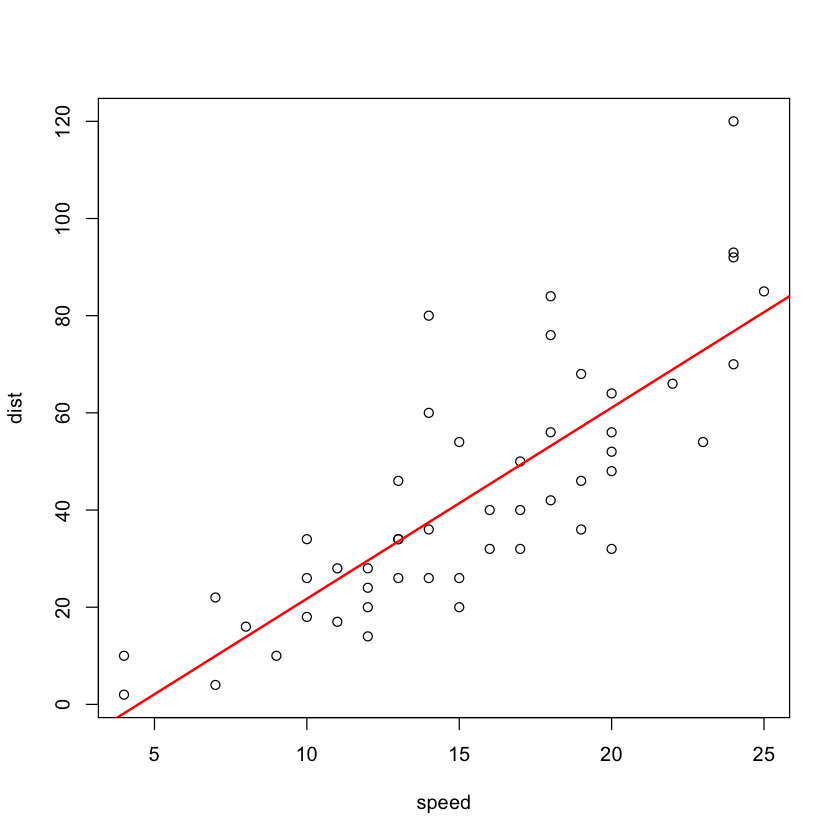

In [17]:
par(bg = 'white')

plot(dist ~ speed, cars)
abline(fit, col="red", lw=2)

### Another linear model

In [40]:
# fitting linear regression model : a0 + a1*speed + a2(speed)^2 + e
m1 = lm(dist ~ poly(speed, 2), cars)
m1


Call:
lm(formula = dist ~ poly(speed, 2), data = cars)

Coefficients:
    (Intercept)  poly(speed, 2)1  poly(speed, 2)2  
          42.98           145.55            23.00  


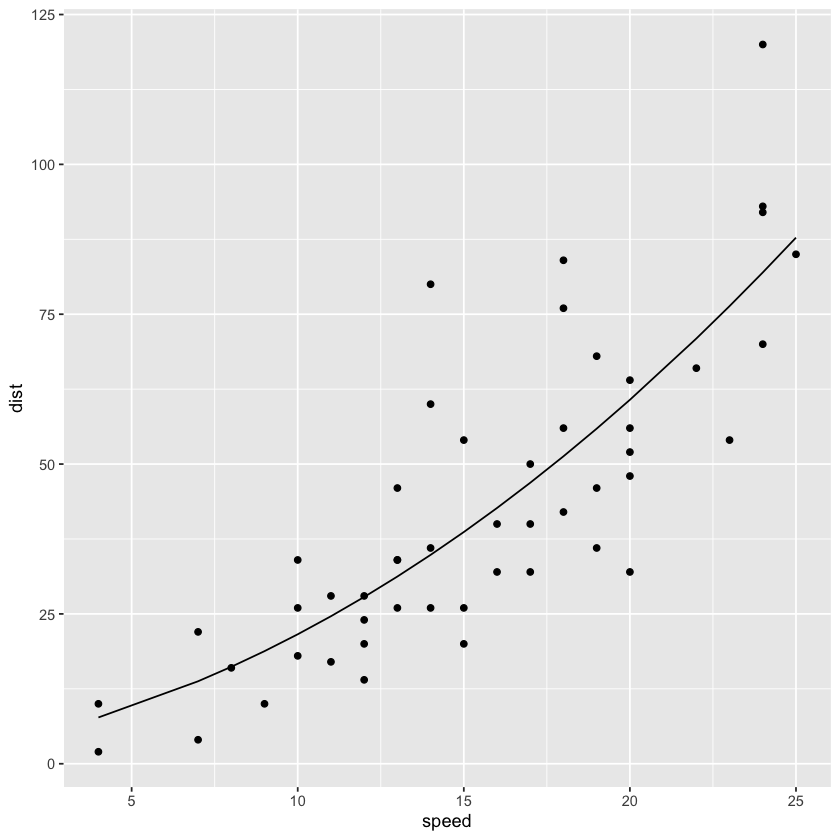

In [32]:
# plotting
library(ggplot2)

ggplot(cbind(cars, fit=fitted(m1)), aes(speed, dist)) + geom_point() + geom_line(aes(y=fit))

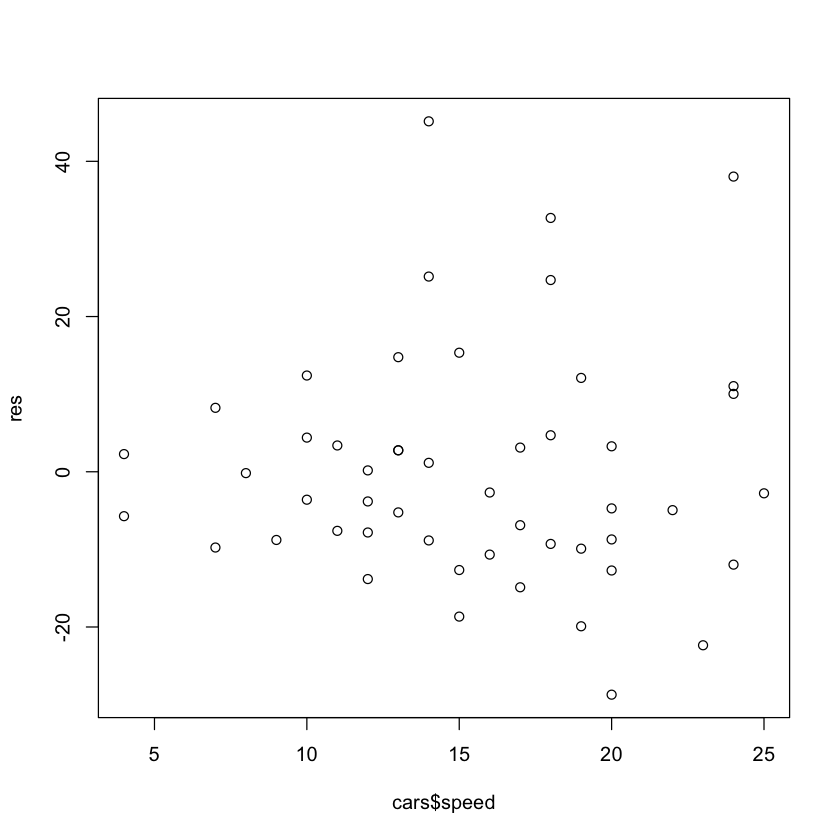

In [38]:
# residuals from the model m1 / odległosci prawdziwe od modelu -> rosną wraz ze wzrostem prędkości
res = cars$dist - fitted(m1)

par(bg = 'white')
plot(res ~ cars$speed)

_____

## The General Linear Model

$${\displaystyle Y_{i}=\beta _{0}+\beta _{1}X_{i1}+\beta _{2}X_{i2}+\ldots +\beta _{p}X_{ip}+\epsilon _{i}}$$

In [3]:
m0 = lm(dist ~ speed, cars)

# two equivalents to obtain model matrix -> representation of data with the matrix. 
# 1s are 'values' for B0, speed are values for B1

m0_matrix = model.matrix(m0)
# model.matrix(~ speed, cars)

head(m0_matrix)

,(Intercept),speed
1,1,4
2,1,4
3,1,7
4,1,7
5,1,8
6,1,9


In [4]:
# the simplest possible linear model

m <- lm(dist ~ speed, cars)
m


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


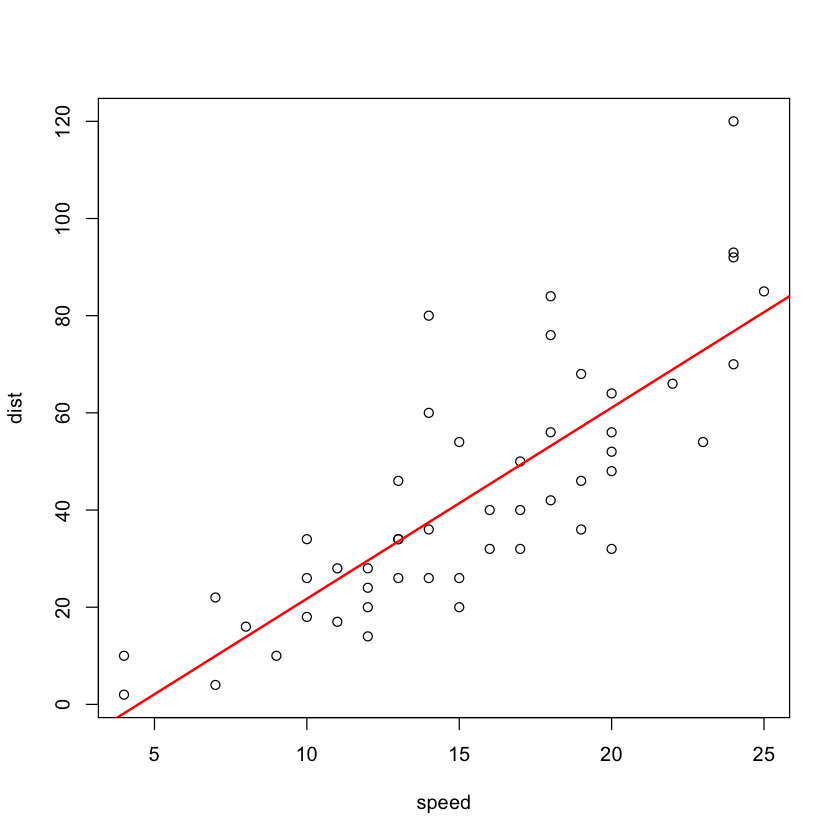

In [5]:
par(bg = 'white')

plot(dist ~ speed, cars)
abline(m, col="red", lw=2)

-----

## Bayesian Inference

In [59]:
m1 = stan_glm(dist ~ speed, data = cars)
m1

stan_glm
 family:       gaussian [identity]
 formula:      dist ~ speed
 observations: 50
 predictors:   2
------
            Median MAD_SD
(Intercept) -17.6    6.6 
speed         3.9    0.4 

Auxiliary parameter(s):
      Median MAD_SD
sigma 15.6    1.6  

------
* For help interpreting the printed output see ?print.stanreg
* For info on the priors used see ?prior_summary.stanreg

In [81]:
# Let's have a look at the samples form the posterior distribution of the intercept and the slope

samples_df = as.data.frame(m1)
colnames(samples_df) <- c("intercept", "speed", "sigma")
head(samples_df)

,intercept,speed,sigma
,<dbl>,<dbl>,<dbl>
1,-15.53251,3.877263,15.90016
2,-14.49614,3.581191,14.66164
3,-18.50027,3.957703,14.50995
4,-15.51573,3.846583,15.45740
5,-10.93991,3.460032,14.83336
6,-19.28571,4.013723,16.18057


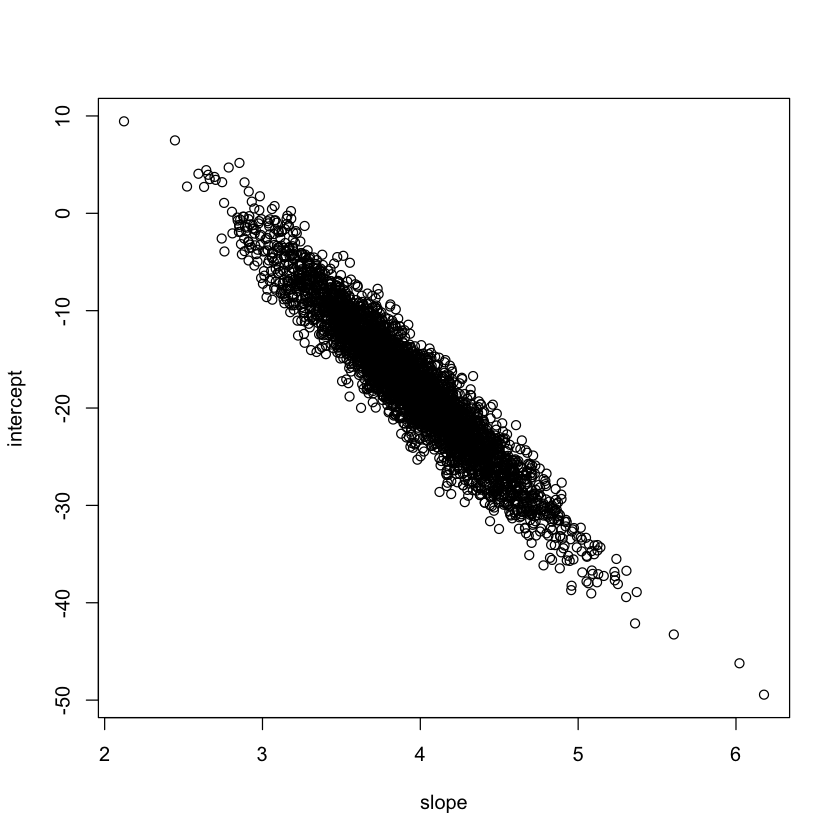

In [67]:
par(bg = 'white')

# so we have many random samples from distribution intercept x slope -> every probable result
plot(samples_df[,1] ~ samples_df[,2], xlab="slope", ylab="intercept")

In [89]:
# print parameters that are in choosen confidence interval - BAYESIAN INFERENCE

quantile(samples_df$speed, c(0.025, 0.975))
quantile(samples_df$intercept, c(0.025, 0.975))

2.5%    97.5% 
3.081912 4.792179

2.5%      97.5% 
-31.013380  -3.542325

In [92]:
# print parameters that are in choosen confidence interval - FREQUENTIST ANALYSIS

confint(lm(dist ~ speed, cars))

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


In [95]:
# print parameters that are in choosen confidence interval - BAYESIAN INFERENCE

summary(stan_glm(dist ~ speed, data = cars), probs = c(.025, .975))


Model Info:
 function:     stan_glm
 family:       gaussian [identity]
 formula:      dist ~ speed
 algorithm:    sampling
 sample:       4000 (posterior sample size)
 priors:       see help('prior_summary')
 observations: 50
 predictors:   2

Estimates:
              mean   sd    2.5%   97.5%
(Intercept) -17.5    7.1 -31.5   -3.1  
speed         3.9    0.4   3.0    4.8  
sigma        15.7    1.7  12.8   19.3  

Fit Diagnostics:
           mean   sd   2.5%   97.5%
mean_PPD 43.0    3.2 36.8   49.2   

The mean_ppd is the sample average posterior predictive distribution of the outcome variable (for details see help('summary.stanreg')).

MCMC diagnostics
              mcse Rhat n_eff
(Intercept)   0.1  1.0  3364 
speed         0.0  1.0  3326 
sigma         0.0  1.0  3341 
mean_PPD      0.1  1.0  2735 
log-posterior 0.0  1.0  1783 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is the potential scale reduction factor on